In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
#import and read excel file on mental health
excelfile=("../Resources/SAMHDA/SAMHDA_MentalIllnessbyState/Combined_mentalillness_2010-17.xlsx")
df_illness=pd.read_excel(excelfile)
df_illness['estimate']=df_illness['estimate']*100
df_illness.head()

,outcome,age_group,year_pair,year,state,estimate,ci_lower,ci_upper
0,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,Alabama,21.7199,0.193466,0.242966
1,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,Alaska,19.2302,0.168741,0.218289
2,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,Arizona,19.7642,0.171977,0.226091
3,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,Arkansas,20.6251,0.180644,0.234450
4,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,California,16.3427,0.150571,0.177151


In [68]:
#import and read excel file on suicides
excelfile=("../Resources/CDC/SuicideRates/Suicide_combined_byState.xlsx")
df_suicide=pd.read_excel(excelfile)
df_suicide.head()

,STATE abbr,RATE,DEATHS,year,State
0,AL,11.5,535.0,2005,Alabama
1,AK,19.9,131.0,2005,Alaska
2,AZ,16.4,945.0,2005,Arizona
3,AR,14.3,400.0,2005,Arkansas
4,CA,9.1,3206.0,2005,California


In [76]:
#merging 2 files based on year and state

#add a new column year-state to mental illness data
df_illness['year-state']=df_illness['year'].map(str)+df_illness['state']
df_illness.head()


#add a new column year-state to suicide data
df_suicide['year-state']=df_suicide['year'].map(str)+df_suicide['State']
df_suicide.head()

#merging files
df_illness_suicide=pd.merge(df_illness, df_suicide, on="year-state", how="left",suffixes=('_ill','_sui'))
df_illness_suicide.head()

#suicide data available 2014 onwards, filtering data frame accordingly
df_ill_sui_201417=df_illness_suicide.loc[df_illness_suicide['year_ill']>2013,:]
df_ill_sui_201417=df_ill_sui_201417.loc[df_ill_sui_201417['state']!='District of Columbia',:]
df_ill_sui_201417.head()

# df_ill_sui_201417.to_csv("Test.csv")

,outcome,age_group,year_pair,year_ill,state,estimate,ci_lower,ci_upper,year-state,STATE abbr,RATE,DEATHS,year_sui,State
153,Any Mental Illness in the Past Year,18 or Older,2013-14,2014,Alabama,19.5067,0.172477,0.219831,2014Alabama,AL,14.5,715.0,2014.0,Alabama
154,Any Mental Illness in the Past Year,18 or Older,2013-14,2014,Alaska,18.1217,0.160989,0.203370,2014Alaska,AK,22.1,167.0,2014.0,Alaska
155,Any Mental Illness in the Past Year,18 or Older,2013-14,2014,Arizona,18.5888,0.164041,0.209915,2014Arizona,AZ,18.0,1244.0,2014.0,Arizona
156,Any Mental Illness in the Past Year,18 or Older,2013-14,2014,Arkansas,19.9982,0.178473,0.223379,2014Arkansas,AR,17.3,515.0,2014.0,Arkansas
157,Any Mental Illness in the Past Year,18 or Older,2013-14,2014,California,18.1413,0.169561,0.193899,2014California,CA,10.5,4214.0,2014.0,California


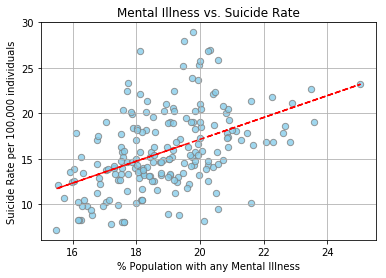

In [78]:
#scatter plot-all years together

scatter_ill_sui=df_ill_sui_201417.plot.scatter(x='estimate',
                                               y='RATE',
                                               grid=True,
                                               title='Mental Illness vs. Suicide Rate',
                                               color='skyblue',
                                               edgecolor='grey',
                                               s=40,
                                               alpha=.8
                                               )
plt.xlabel('% Population with any Mental Illness')
plt.ylabel('Suicide Rate per 100,000 individuals')

z = np.polyfit(df_ill_sui_201417['estimate'], df_ill_sui_201417['RATE'], 1)
p = np.poly1d(z)
plt.plot(df_ill_sui_201417['estimate'],p(df_ill_sui_201417['estimate']),"r--")

plt.show()

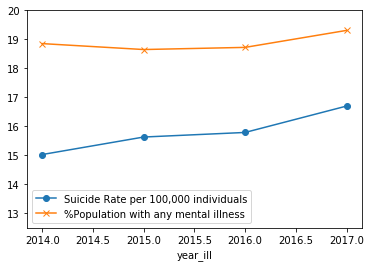

In [32]:
#for line chart

plt.subplot

df_ill_sui_grpby=df_ill_sui_201417.groupby(['year_ill'])
sui_rate=df_ill_sui_grpby['RATE'].mean()
ill_rate=df_ill_sui_grpby['estimate'].mean()

line_chart=sui_rate.plot(kind='line',marker='o',label='Suicide Rate per 100,000 individuals')
line_chart=ill_rate.plot(kind='line',marker='x',label='%Population with any mental illness')

line_chart.set_ylim(12.5,20)
line_chart.legend()

In [11]:
#chloropleth

# df_ill_sui_17=df_illness_suicide.loc[df_illness_suicide['year_ill']==2017,:]
# df_ill_sui_17.head()

# scl = [
#     [0.0, 'rgb(242,240,247)'],
#     [0.2, 'rgb(218,218,235)'],
#     [0.4, 'rgb(188,189,220)'],
#     [0.6, 'rgb(158,154,200)'],
#     [0.8, 'rgb(117,107,177)'],
#     [1.0, 'rgb(84,39,143)']
# ]

# data = [go.Choropleth(
#     colorscale = scl,
#     autocolorscale = False,
#     locations = df_ill_sui_17['state'],
#     z = df_ill_sui_17['estimate'],
#     locationmode = 'USA-states',
#     marker = go.choropleth.Marker(
#         line = go.choropleth.marker.Line(
#             color = 'rgb(255,255,255)',
#             width = 2
#         )),
#     colorbar = go.choropleth.ColorBar(
#         title = "Mentall Illness Rate")
# )]

# layout = go.Layout(
#     title = go.layout.Title(
#         text = 'Mental Illness rate'
#     ),
#     geo = go.layout.Geo(
#         scope = 'usa',
#         projection = go.layout.geo.Projection(type = 'albers usa'),
#         showlakes = True,
#         lakecolor = 'rgb(255, 255, 255)'),
# )

# fig = go.Figure(data = data, layout = layout)
# #py.iplot(fig, filename = 'Illness_cloropleth-map')

In [12]:
#import and read excel file on income
csvfile=("../Resources/BEA/PersonalIncome_reformatted.csv")
df_income=pd.read_csv(csvfile)
df_income.head()

,GeoName,Description,Year,value
0,United States,Disposable personal income (millions of dollars),2010,11305991.0
1,United States,Population (persons) 1/,2010,309338421.0
2,United States,Per capita disposable personal income (dollars...,2010,36549.0
3,Alabama,Disposable personal income (millions of dollars),2010,148758.8
4,Alabama,Population (persons) 1/,2010,4785579.0


In [13]:

#add a new column year-state to income data
df_income['year-state']=df_income['Year'].map(str)+df_income['GeoName']
df_income.head()

#filtering the data frame to get Per capita disposable personal income
df_income_percapita=df_income.loc[df_income['Description']=='Per capita disposable personal income (dollars) 2/',:]
df_income_percapita.head()

#merging files
df_illness_income=pd.merge(df_illness, df_income_percapita, on="year-state", how="left",suffixes=('_ill','_inc'))
df_illness_income.head()

,outcome,age_group,year_pair,year,state,estimate,ci_lower,ci_upper,year-state,GeoName,Description,Year,value
0,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,Alabama,21.7199,0.193466,0.242966,2011Alabama,Alabama,Per capita disposable personal income (dollars...,2011,31807.0
1,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,Alaska,19.2302,0.168741,0.218289,2011Alaska,Alaska,Per capita disposable personal income (dollars...,2011,47766.0
2,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,Arizona,19.7642,0.171977,0.226091,2011Arizona,Arizona,Per capita disposable personal income (dollars...,2011,31672.0
3,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,Arkansas,20.6251,0.180644,0.234450,2011Arkansas,Arkansas,Per capita disposable personal income (dollars...,2011,30723.0
4,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,California,16.3427,0.150571,0.177151,2011California,California,Per capita disposable personal income (dollars...,2011,40603.0


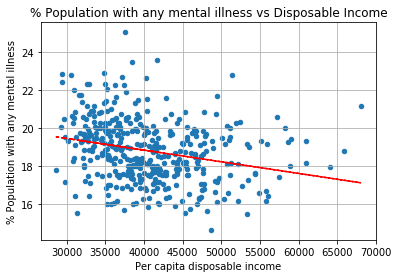

In [62]:
#scatter plot-all years together

scatter_ill_inc=df_illness_income.plot.scatter(x='value',y='estimate',grid=True,title='% Population with any mental illness vs Disposable Income')
plt.xlabel('Per capita disposable income')
plt.ylabel('% Population with any mental illness')


z = np.polyfit(df_illness_income['value'], df_illness_income['estimate'], 1)
p = np.poly1d(z)
plt.plot(df_illness_income['value'],p(df_illness_income['value']),"r--")

plt.show()

In [15]:
#import and read excel file on income
csvfile=("../Resources/BEA/GDPbyStateMn_reformatted.csv")
df_gdp=pd.read_csv(csvfile)
df_gdp.head()

,GeoName,value,year
0,United States*,14992052.0,2010
1,Alabama,174753.0,2010
2,Alaska,52882.5,2010
3,Arizona,248210.0,2010
4,Arkansas,101690.0,2010


In [16]:
#add a new column year-state to gdp data
df_gdp['year-state']=df_gdp['year'].map(str)+df_gdp['GeoName']
df_gdp.head()


#merging files
df_illness_gdp=pd.merge(df_illness, df_gdp, on="year-state", how="left",suffixes=('_ill','_gdp'))
df_illness_gdp.head()

,outcome,age_group,year_pair,year_ill,state,estimate,ci_lower,ci_upper,year-state,GeoName,value,year_gdp
0,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,Alabama,21.7199,0.193466,0.242966,2011Alabama,Alabama,181349.8,2011
1,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,Alaska,19.2302,0.168741,0.218289,2011Alaska,Alaska,56259.9,2011
2,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,Arizona,19.7642,0.171977,0.226091,2011Arizona,Arizona,257947.8,2011
3,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,Arkansas,20.6251,0.180644,0.234450,2011Arkansas,Arkansas,106085.4,2011
4,Any Mental Illness in the Past Year,18 or Older,2010-11-01 00:00:00,2011,California,16.3427,0.150571,0.177151,2011California,California,2050056.8,2011


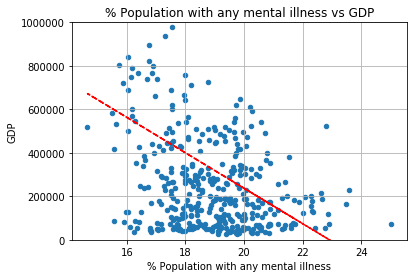

In [66]:
#scatter plot-all years together

scatter_ill_gdp=df_illness_gdp.plot.scatter(x='estimate',y='value',grid=True,title='% Population with any mental illness vs GDP')
plt.xlabel('% Population with any mental illness')
plt.ylabel('GDP')

plt.ylim(0,1000000)

z = np.polyfit(df_illness_gdp['estimate'], df_illness_gdp['value'], 1)
p = np.poly1d(z)
plt.plot(df_illness_gdp['estimate'],p(df_illness_gdp['estimate']),"r--")

plt.show()
